<a href="https://colab.research.google.com/github/shikhaguptadr/ML-PROJECTS/blob/main/Bike_Sharing_Demand_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

## **Import the data**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 1:- ML Appetizer/Day 7/SeoulBikeData.csv'

In [ ]:
df = pd.read_csv(path,encoding = 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w Seasons and Rented Bike Count**

In [ ]:
rl_season_bike = df.groupby('Seasons')['Rented Bike Count'].sum()
rl_season_bike

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


Text(0, 0.5, 'Rented Bike Count')

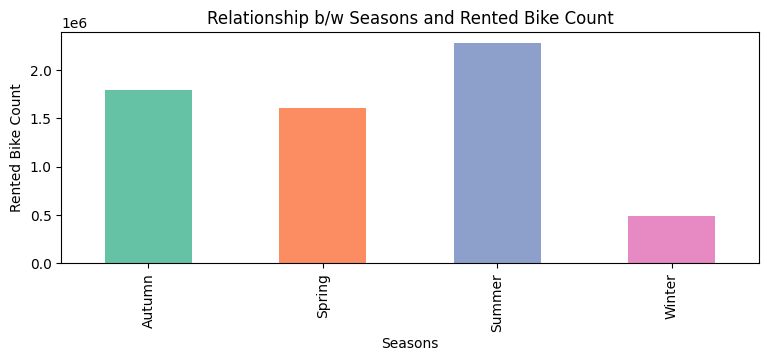

In [ ]:
plt.figure(figsize = (9,3))
rl_season_bike.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Relationship b/w Seasons and Rented Bike Count')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')

#### **Relationship b/w Holiday Seasons and Rented Bike Count**

In [ ]:
rl_holiday_bike = df.groupby('Holiday')['Rented Bike Count'].sum()
rl_holiday_bike

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


Text(0, 0.5, 'Rented Bike Count')

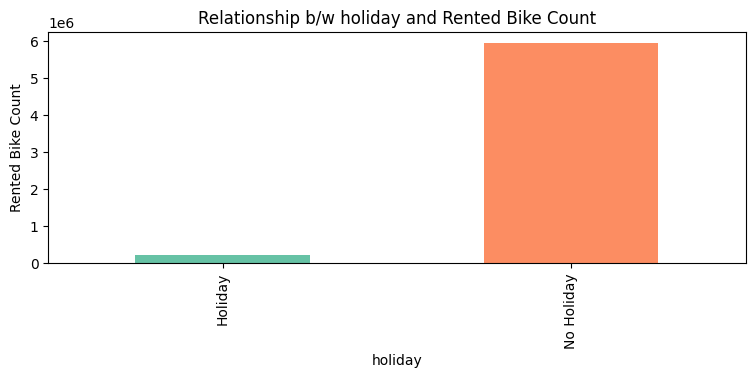

In [ ]:
plt.figure(figsize = (9,3))
rl_holiday_bike.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Relationship b/w holiday and Rented Bike Count')
plt.xlabel('holiday')
plt.ylabel('Rented Bike Count')

In [ ]:
rl_holiday_bike = df.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack()
rl_holiday_bike

Seasons,Autumn,Spring,Summer,Winter
Holiday,,,,
Holiday,91018,45742,49063,30072
No Holiday,1698984,1566167,2234171,457097


Text(0, 0.5, 'Rented Bike Count')

<Figure size 900x300 with 0 Axes>

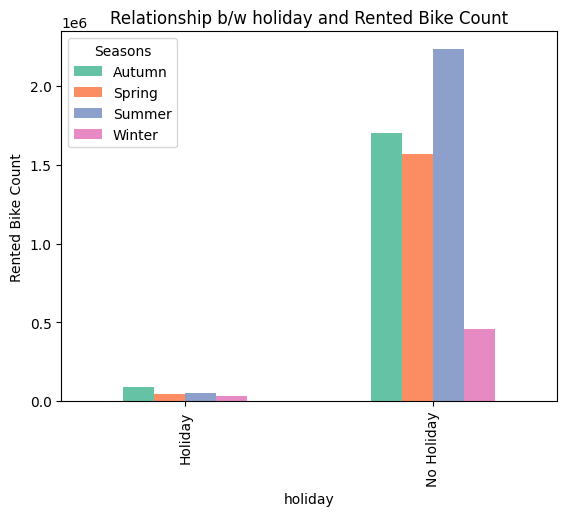

In [ ]:
plt.figure(figsize = (9,3))
rl_holiday_bike.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Relationship b/w holiday and Rented Bike Count')
plt.xlabel('holiday')
plt.ylabel('Rented Bike Count')

#### **Relationship b/w seasons Wind speed (m/s) and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Wind speed (m/s) and bike count')

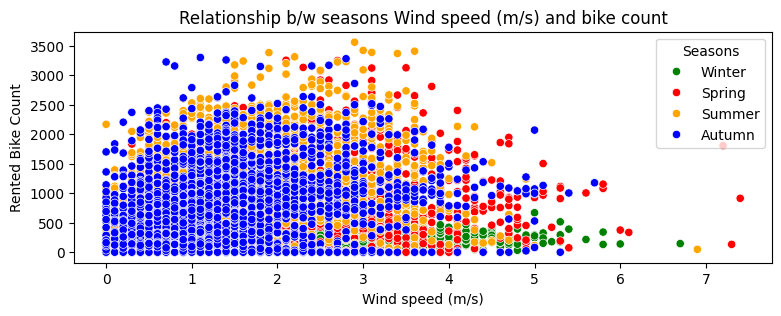

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Wind speed (m/s)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Wind speed (m/s) and bike count')

#### **Relationship b/w seasons Temperature(°C) and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Temperature(°C) and bike count')

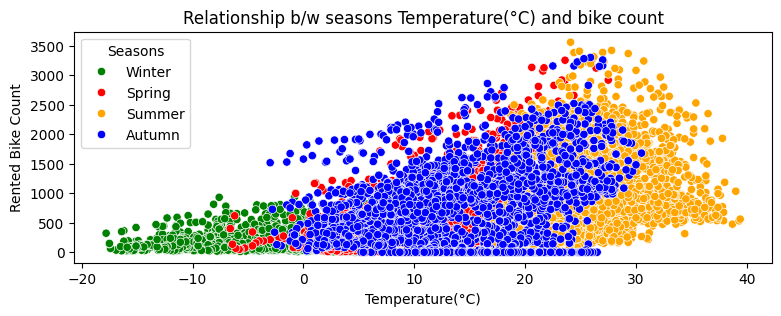

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Temperature(°C)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Temperature(°C) and bike count')

#### **Relationship b/w seasons Temperature(°C) and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Temperature(°C) and bike count')

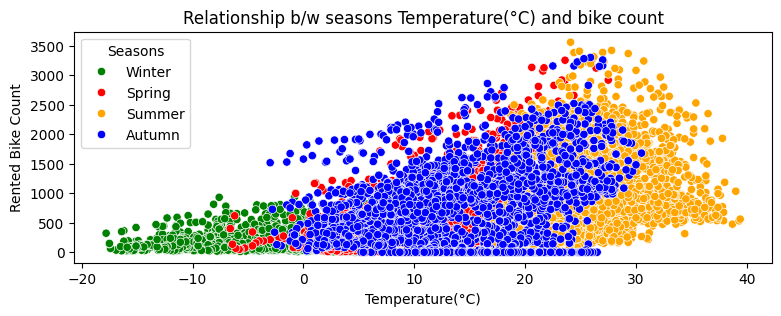

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Temperature(°C)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Temperature(°C) and bike count')

#### **Relationship b/w seasons Visibility (10m)and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Visibility (10m) and bike count')

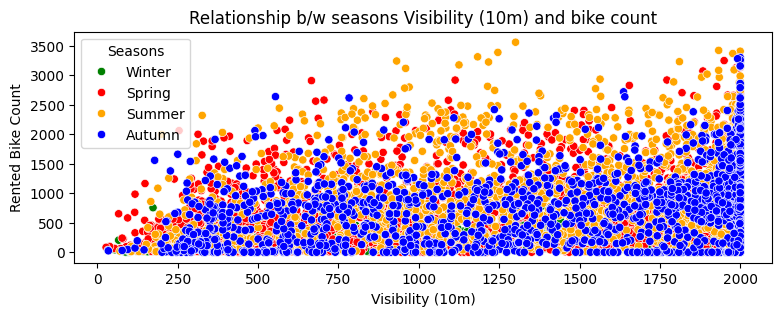

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Visibility (10m)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Visibility (10m) and bike count')

#### **Relationship b/w seasons Solar Radiation (MJ/m2)and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Solar Radiation (MJ/m2) and bike count')

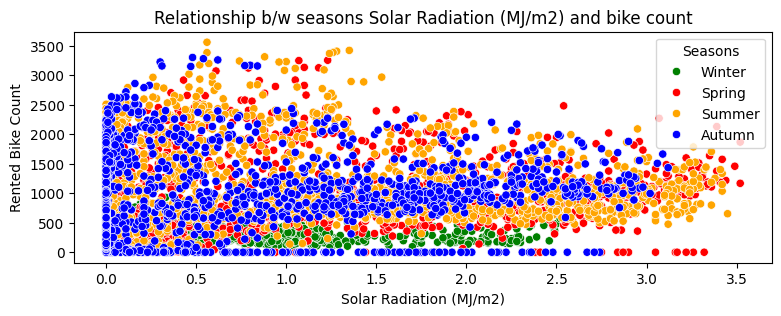

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Solar Radiation (MJ/m2)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Solar Radiation (MJ/m2) and bike count')

#### **Relationship b/w seasons Rainfall(mm) and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Rainfall(mm) and bike count')

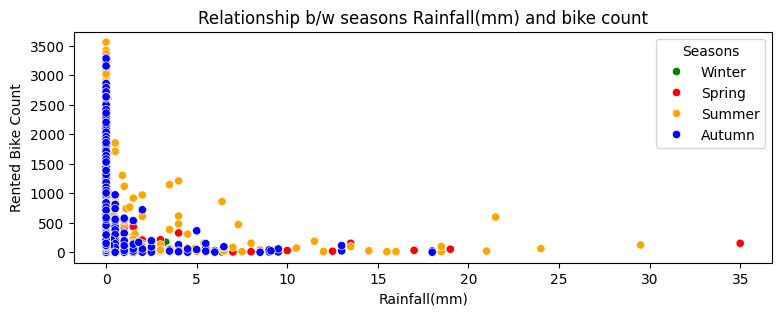

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Rainfall(mm)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Rainfall(mm) and bike count')

#### **Relationship b/w seasons Rainfall(mm) and bike count**

Text(0.5, 1.0, 'Relationship b/w seasons Snowfall (cm) and bike count')

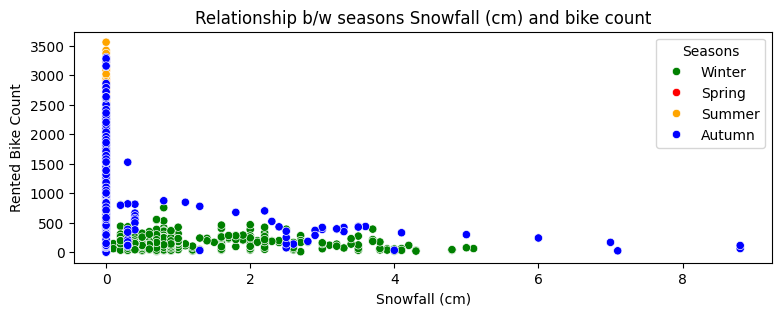

In [ ]:
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Snowfall (cm)',y = 'Rented Bike Count',hue = 'Seasons',data = df,palette=['green','red','orange','blue'])
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w seasons Snowfall (cm) and bike count')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w Functioning Day and bike count**

In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


#### **Relationship b/w Hour and bike count**

In [ ]:
h_r = df.groupby('Hour')['Rented Bike Count'].sum()
h_r

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396
5,50765
6,104961
7,221192
8,370731


Text(0, 0.5, 'Rented Bike Count')

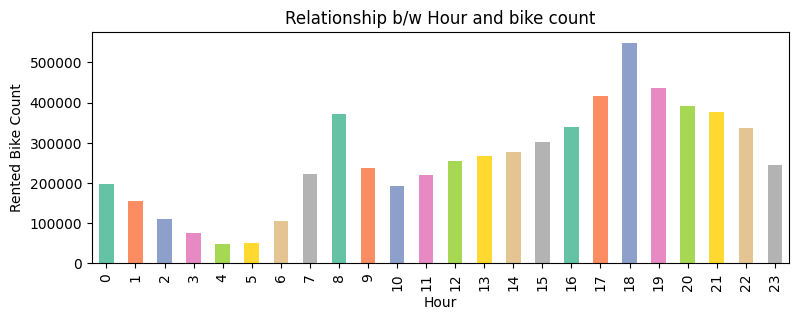

In [ ]:
plt.figure(figsize = (9,3))
h_r.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Relationship b/w Hour and bike count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

#### **Relationship b/w Month and bike count**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df['Date'][0]

'01/12/2017'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
print(df['Date'][0])

2017-12-01 00:00:00


In [ ]:
print(df['Date'][0].day_name())

Friday


In [ ]:
print(df['Date'][0].month)

12


In [ ]:
df['month'] = df['Date'].dt.month
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12


Text(0, 0.5, 'Rented Bike Count')

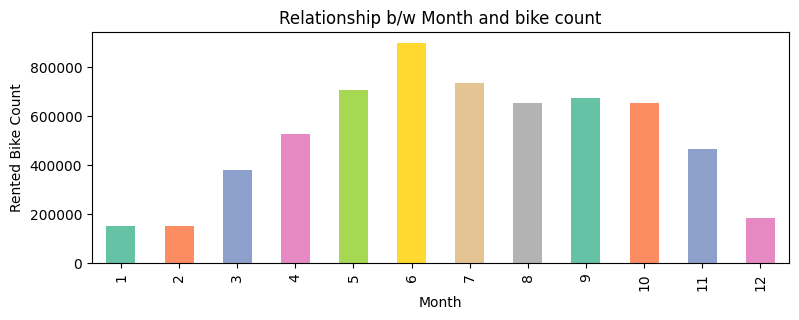

In [ ]:
plt.figure(figsize = (9,3))
df.groupby('month')['Rented Bike Count'].sum().plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.title('Relationship b/w Month and bike count')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')

## **Feature Engineering**

### **Feature incoding And creation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df['day_name'] = df['Date'].dt.day_name()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday


In [ ]:
df['week'] = df['day_name'].apply(lambda x : 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,Weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,Weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,Weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,Weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,Weekday


In [ ]:
df['week'].value_counts()

,count
week,
Weekday,6264
Weekend,2496


In [ ]:
df['month'] = df['Date'].dt.month_name()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday


In [ ]:
df.drop('Date',axis = 1,inplace = True)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'day_name', 'week'],
      dtype='object')

Text(0, 0.5, 'Rented Bike Count')

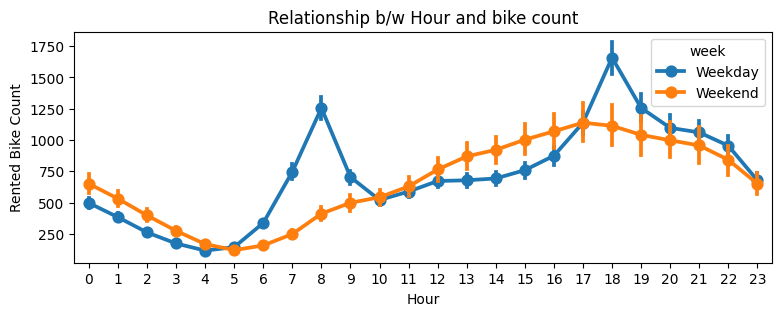

In [ ]:
plt.figure(figsize = (9,3))
sns.pointplot(x = 'Hour',y = 'Rented Bike Count',data = df,hue = 'week')
plt.title('Relationship b/w Hour and bike count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

**Lets do some feature engineering on Hour column**

In [ ]:
def get_bin(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  if h >= 7 and h <= 10:
    return 'Morning'
  if h >= 11 and h <= 16:
    return 'Noon'
  else:
    return 'Night'

In [ ]:
df['Hour'] = df['Hour'].apply(get_bin)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name,week
0,254,Night,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
1,204,Night,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
2,173,Night,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
3,107,Night,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
4,78,Night,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday


In [ ]:
df['Hour'].value_counts()

,count
Hour,
Night,2920
Noon,2190
Evening,2190
Morning,1460


#### **Correlation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

In [ ]:
corr_df = df.select_dtypes(exclude = 'object')
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 616.1 KB


In [ ]:
corr_df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<Axes: >

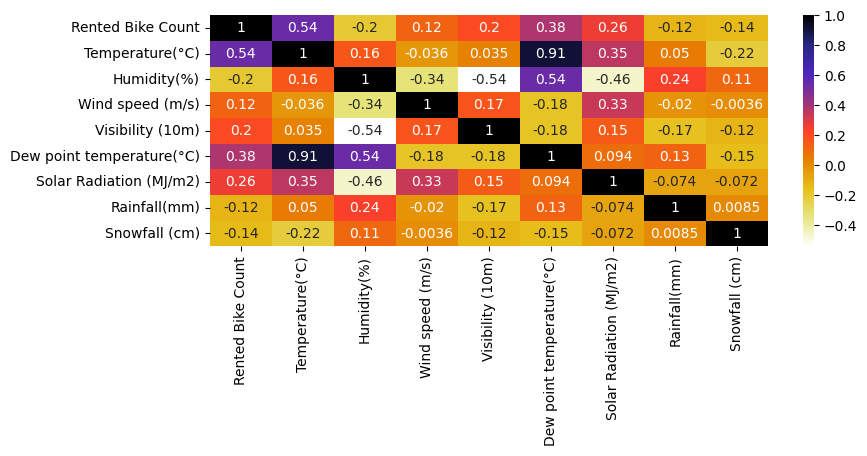

In [ ]:
plt.figure(figsize = (9,3))
sns.heatmap(corr_df.corr(),annot = True,cmap=plt.cm.CMRmap_r)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'day_name', 'week'],
      dtype='object')

In [ ]:
df.drop(columns= ['Dew point temperature(°C)','day_name'],axis = 1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,254,Night,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
1,204,Night,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
2,173,Night,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
3,107,Night,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
4,78,Night,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,Evening,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Weekday
8756,764,Evening,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Weekday
8757,694,Evening,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Weekday
8758,712,Evening,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Weekday


In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name,week
0,254,Night,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
1,204,Night,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
2,173,Night,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
3,107,Night,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday
4,78,Night,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,Weekday


In [ ]:
df.drop(columns= ['Dew point temperature(°C)','day_name'],axis = 1,inplace = True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,254,Night,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
1,204,Night,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
2,173,Night,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
3,107,Night,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday
4,78,Night,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Weekday


## **Data Pre-processing**

### **Feature Scaling**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   object 
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  month                    8760 non-null   object 
 13  week                     8760 non-null   object 
dtypes: float64(5), int64(3),

In [ ]:
df['Seasons'].value_counts()

,count
Seasons,
Spring,2208
Summer,2208
Autumn,2184
Winter,2160


In [ ]:
# gender
# male
# female
# male

In [ ]:
# male_gender   female_gender
#     1             0
#     0             1
#     1             0

In [ ]:
# female_gender
#     0
#     1
#     0

In [ ]:
df = pd.get_dummies(df,drop_first = True)
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_Morning,Hour_Night,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Hour_Morning             8760 non-null   bool   
 9   Hour_Night               8760 non-null   bool   
 10  Hour_Noon                8760 non-null   bool   
 11  Seasons_Spring           8760 non-null   bool   
 12  Seasons_Summer           8760 non-null   bool   
 13  Seasons_Winter           8760 non-null   bool   
 14  Holiday_No Holiday      

In [ ]:
x = df.drop('Rented Bike Count',axis = 1)
y = df['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **Model Implementation**

### **Import Dependancy**

In [ ]:
# Appending all models parameters to the corrosponding list
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')



  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them

  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.6481736427840763
MAE : 299.16491070358256
MSE : 152849.9608694507
RMSE : 390.96030600234945
R2 : 0.6331421070543479
Adjusted R2 :  0.6273966528144799 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


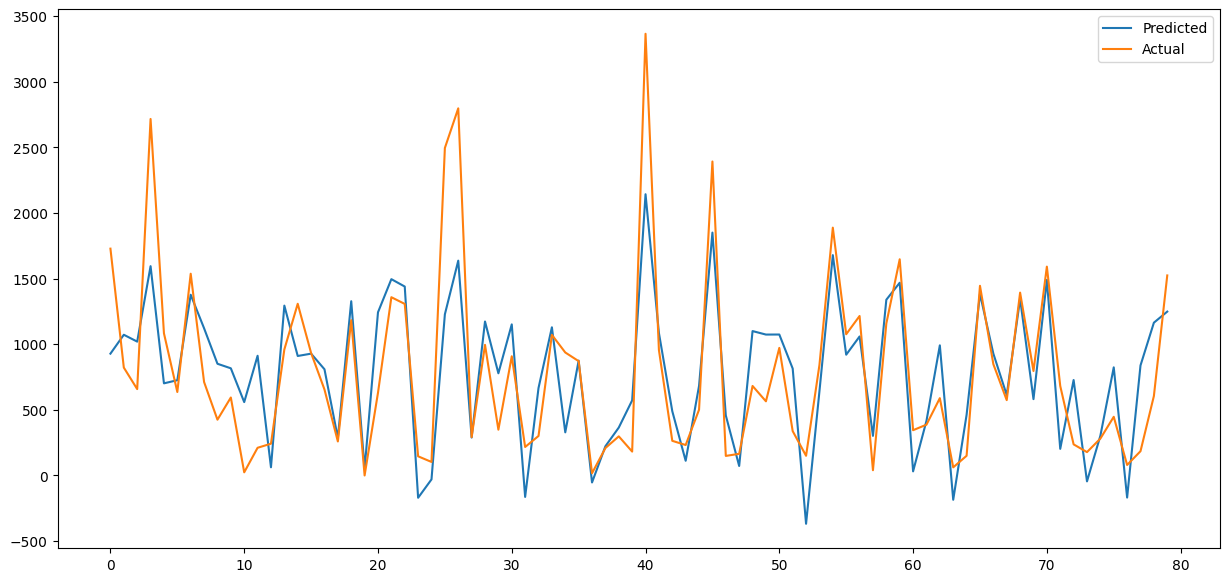

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=10) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.396e+08, tolerance: 2.640e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.362e+08, tolerance: 2.622e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.422e+08, tolerance: 2.625e

Training score  = 0.6481728154587552
MAE : 299.1117952710622
MSE : 152838.47066914625
RMSE : 390.9456108835937
R2 : 0.633169684887206
Adjusted R2 :  0.6274246625507528 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


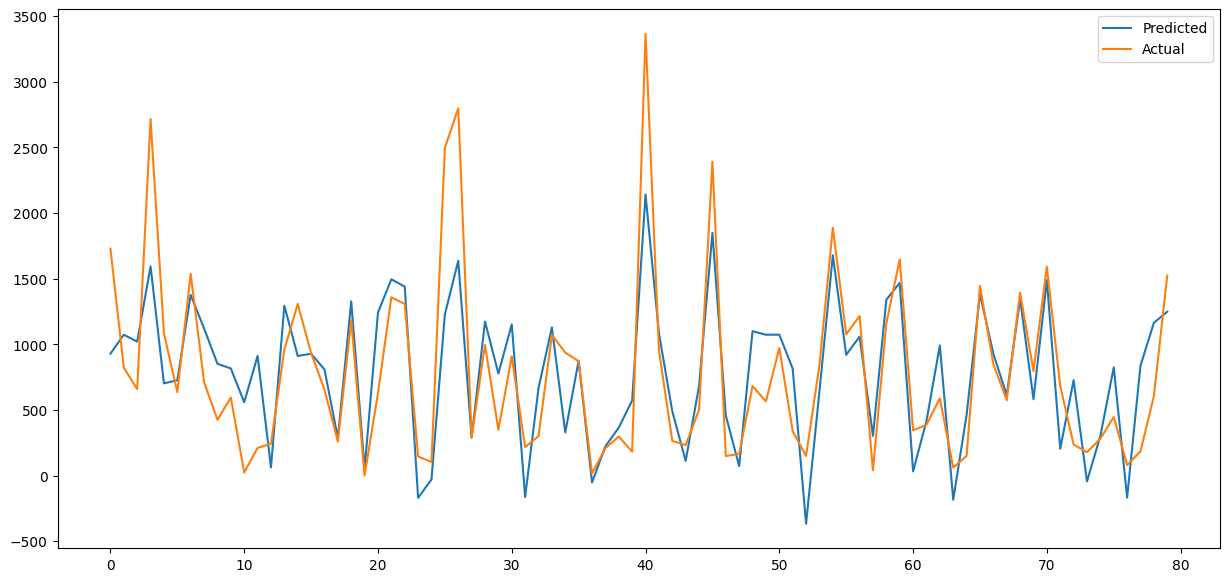

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.64259e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Training score  = 0.6481718388938849
MAE : 299.09383398883335
MSE : 152835.37452136114
RMSE : 390.9416510444508
R2 : 0.6331771160062344
Adjusted R2 :  0.6274322100504155 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


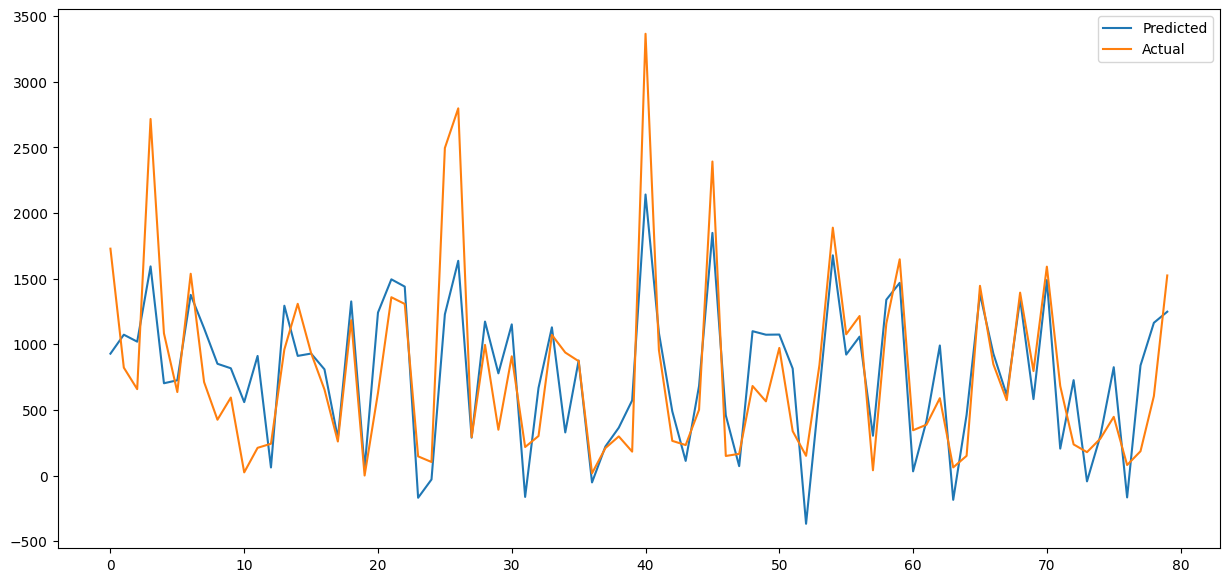

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [ ]:
poly = PolynomialFeatures(degree = 2)
x_train_poli = poly.fit_transform(x_train)
x_test_poli = poly.transform(x_test)

#### **LinearRegression**

Training score  = 0.8237712978560889
MAE : 206.62903317166055
MSE : 92326.44318454652
RMSE : 303.8526669037916
R2 : 0.7784056716980243
Adjusted R2 :  0.7115154878388406 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


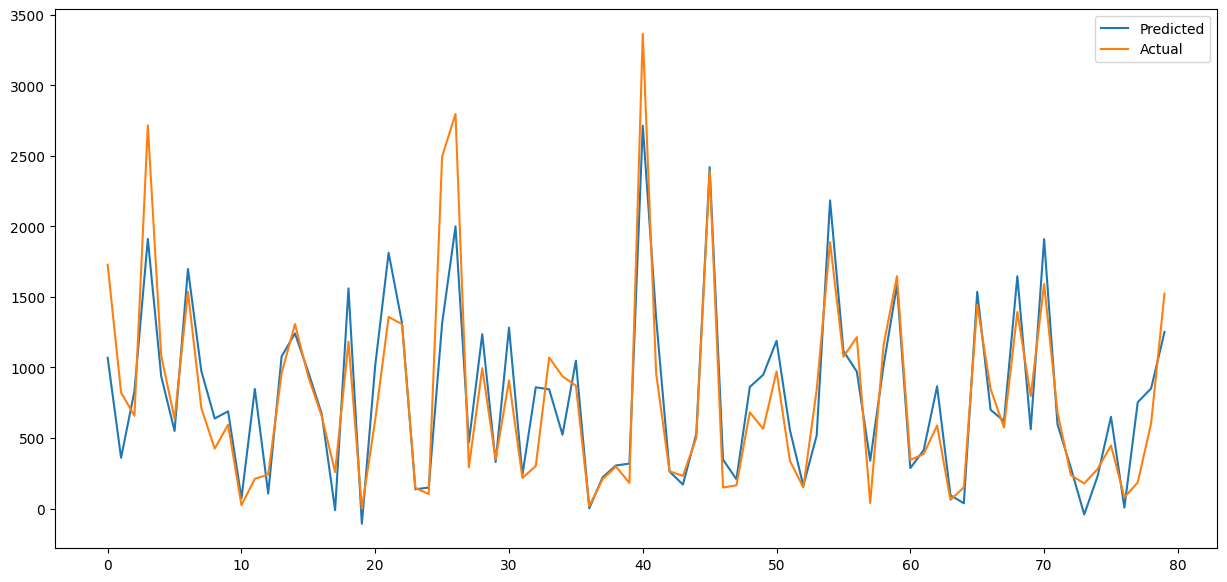

In [ ]:
score_metrix(LinearRegression(),x_train_poli,x_test_poli,y_train,y_test)

### **KNN Regressor**

Training score  = 0.8831650338720389
MAE : 189.63310502283105
MSE : 84096.1502739726
RMSE : 289.99336246537194
R2 : 0.7981593431960335
Adjusted R2 :  0.7949982656242777 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


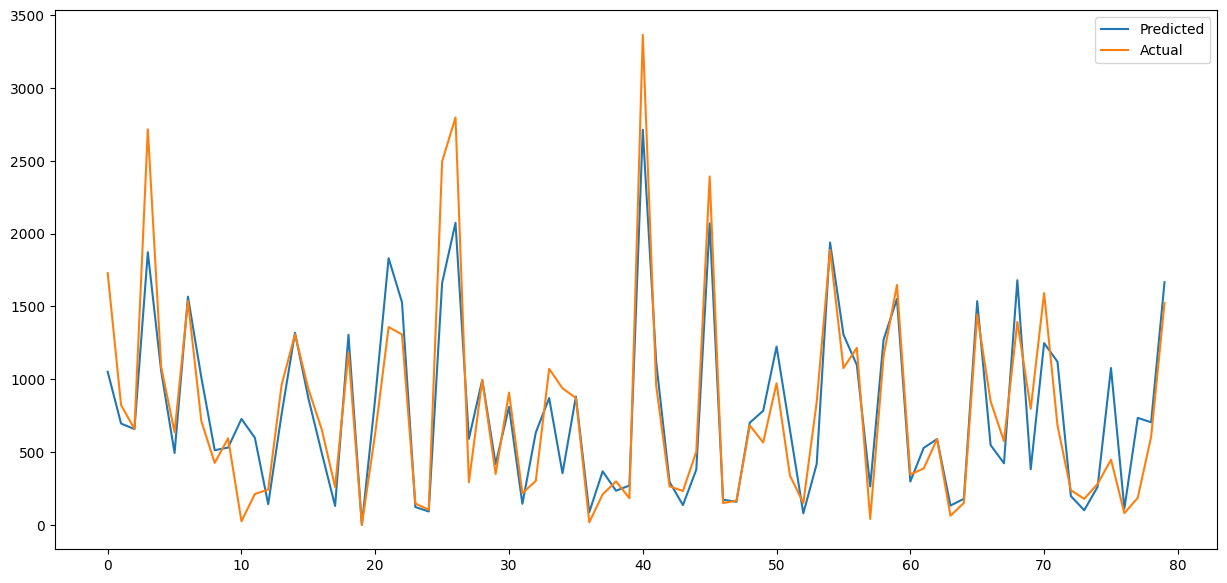

In [ ]:
knn = KNeighborsRegressor()
score_metrix(knn,x_train,x_test,y_train,y_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
x.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Hour_Morning', 'Hour_Night', 'Hour_Noon',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'week_Weekend'],
      dtype='object')

In [ ]:
x_train[0]

array([ 0.02237011,  0.13701177,  2.09293986, -1.17611282,  0.5197009 ,
       -0.13401915, -0.17102636, -0.44560449, -0.70529136,  1.71314566,
       -0.58569899, -0.57778965, -0.56834235,  0.22996655,  0.18708879,
       -0.30319787, -0.30179287, -0.28778168, -0.30319787, -0.30347835,
       -0.2984029 , -0.30905262, -0.30849817,  3.36076432, -0.31098813,
       -0.29612847, -0.63438274])

In [ ]:
y_train.head(1)

,Rented Bike Count
8415,995


In [ ]:
model.predict([[ 0.02237011,  0.13701177,  2.09293986, -1.17611282,  0.5197009 ,
       -0.13401915, -0.17102636, -0.44560449, -0.70529136,  1.71314566,
       -0.58569899, -0.57778965, -0.56834235,  0.22996655,  0.18708879,
       -0.30319787, -0.30179287, -0.28778168, -0.30319787, -0.30347835,
       -0.2984029 , -0.30905262, -0.30849817,  3.36076432, -0.31098813,
       -0.29612847, -0.63438274]])

array([960.4])